## Exercise 1

In this exercise you need to plot ocean depth against ocean age. You have the topography / bathymetry data and the age data. You should do this for the "deep oceans" to avoid including the continental shelves and, for that matter, the continents. The age dataset is only valid where there are magnetic stripes. Other places in the grid are flagged as _"Not a Number"_ or _NaN_ and will not plot. You might have to strip out these points for plotting / curve fitting though.

### Instructions 

You can submit this notebook by email but you MUST rename it so we know who it is from. If you used a crazy pseudonym, please let us know when you submit your assigments. 

I expect to be able to run this notebook before I read your answer!

In [105]:
%pylab inline

from osgeo import gdal

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from scipy.io import netcdf
from scipy.misc import imresize

Populating the interactive namespace from numpy and matplotlib


C:\Users\court\Documents\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Hint

You will need to have the two datasets at the same resolution and valid data shape. The data are stored in an image so re-interpolation can be done with the image resizing fanciness available in ... (guess where !)

In [106]:
etopoH = gdal.Open("Resources/ETOPO1_Ice_c_geotiff.tif") 
etopoH_img = etopoH.ReadAsArray()[::4,::4]
del(etopoH)

ages = np.load("Resources/global_age_data.3.6.z.npz")["ageData"]



In [107]:
#resize depth 
etopoH_1 = imresize(etopoH_img, ages.shape, interp='bilinear', mode="F")
etopoH_1[ np.isnan(ages) ] = np.nan

C:\Users\court\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


## Task

Make a map of `etopoH_1` and `ages` (check they are the same shape and same NaN mask)

It may also help to plot plate motion arrows on the map to highlight divergent v. convergent zones. In order to do this "intuitively" you probably should choose the NNR (no net rotation) velocity field which tends to show major ridges as spreading in opposite directions. 

You will need to think about:

  * which features are useful to include (a coastline, shaded relief etc ?) 
  * plate motion arrows (see `GlobalPlateMotions` notebook) ? 

In [108]:
print (etopoH_img.shape)
print (etopoH_1.shape)
print (ages.shape)

(2700, 5400)
(1801, 3601)
(1801, 3601)


Text(0.5, 1.0, 'Ocean Age and Plate Motion')

C:\Users\court\Documents\Anaconda3\lib\site-packages\scipy\io\netcdf.py:317: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)


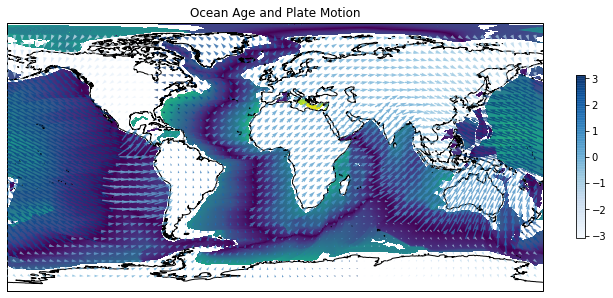

In [109]:
base_projection = ccrs.PlateCarree() 
extent = [-180, 180,-90,90]

#Plot map
fig = plt.figure(figsize=(12, 6), facecolor="none")
ax = plt.axes(projection=base_projection)
ax.coastlines(resolution='50m', zorder=1)  
ax.imshow(ages, extent = extent, transform = ccrs.PlateCarree(), origin="upper", )


#Plate motion
rootgrp = netcdf.netcdf_file(filename="Reference/velocity_NNR.nc", version=2)

ve = rootgrp.variables["ve"]
vn = rootgrp.variables["vn"]

lonv = rootgrp.variables["lon"]
latv = rootgrp.variables["lat"]

lons = lonv[::5]
lats = latv[::5]
llX, llY = np.meshgrid(lons,lats)

Veast = (np.array(ve[::5,::5]).T)
Vnorth = (np.array(vn[::5,::5]).T)

Vorientation = np.arctan2(Vnorth,Veast)


mappable1 = ax.quiver(llX, llY, Veast, Vnorth, Vorientation, scale=2000, transform=ccrs.PlateCarree(),
        cmap=cm.Blues, alpha=0.7, zorder=13, pivot="mid")

plt.colorbar(mappable1, shrink=0.5)
plt.title("Ocean Age and Plate Motion")
#print(llX.shape, llY.shape)          

Text(0.5, 1.0, 'Ocean Depth and Tectonic Plate Motion')

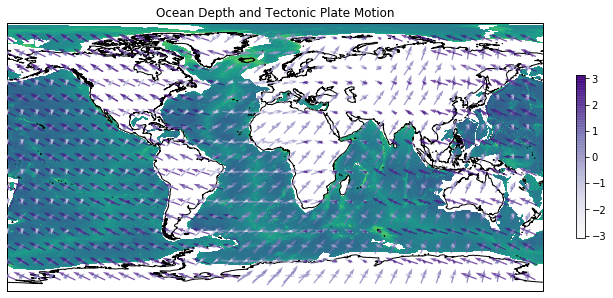

In [110]:
base_projection = ccrs.PlateCarree() 
extent=[-180, 180,-90,90]

#Plot map
fig = plt.figure(figsize=(12, 6), facecolor="none")
ax = plt.axes(projection=base_projection)
ax.coastlines(resolution='50m', zorder=1)  
ax.imshow(etopoH_1, extent = extent, transform = ccrs.PlateCarree(), origin="upper", )

#Plate motion
rootgrp = netcdf.netcdf_file(filename = "Reference/velocity_NNR.nc", version=2)

ve = rootgrp.variables["ve"]
vn = rootgrp.variables["vn"]

lonv = rootgrp.variables["lon"]
latv = rootgrp.variables["lat"]

lons = lonv[::10]
lats = latv[::10]
llX, llY = np.meshgrid(lons,lats)

Veast = (np.array(ve[::5,::5]).T)
Vnorth = (np.array(vn[::5,::5]).T)

Vorientation = np.arctan2(Vnorth,Veast)


mappable1 = ax.quiver(llX, llY, Veast, Vnorth, Vorientation, scale=2000, transform=ccrs.PlateCarree(),
        cmap=cm.Purples, alpha=0.7, zorder=13, pivot="mid")

plt.colorbar(mappable1, shrink=0.5)
plt.title("Ocean Depth and Tectonic Plate Motion")
#print(llX.shape, llY.shape)  

### Task

Make a scatter plot of the depth against age. You might need to downsample the number of points as there are a lot of them:

```python 
ages_decimated = ages[::10]
topo_decimated = etopoH[::10]
``` 

Do you see any systematic trend ?

**Hint:** don't worry if you do not 

In [111]:
x = ages[::100]
y = etopoH_1[::100]

In [112]:
x[~np.isnan(x)]
print (x.shape)

y[~np.isnan(y)]
print (y.shape)

(19, 3601)
(19, 3601)


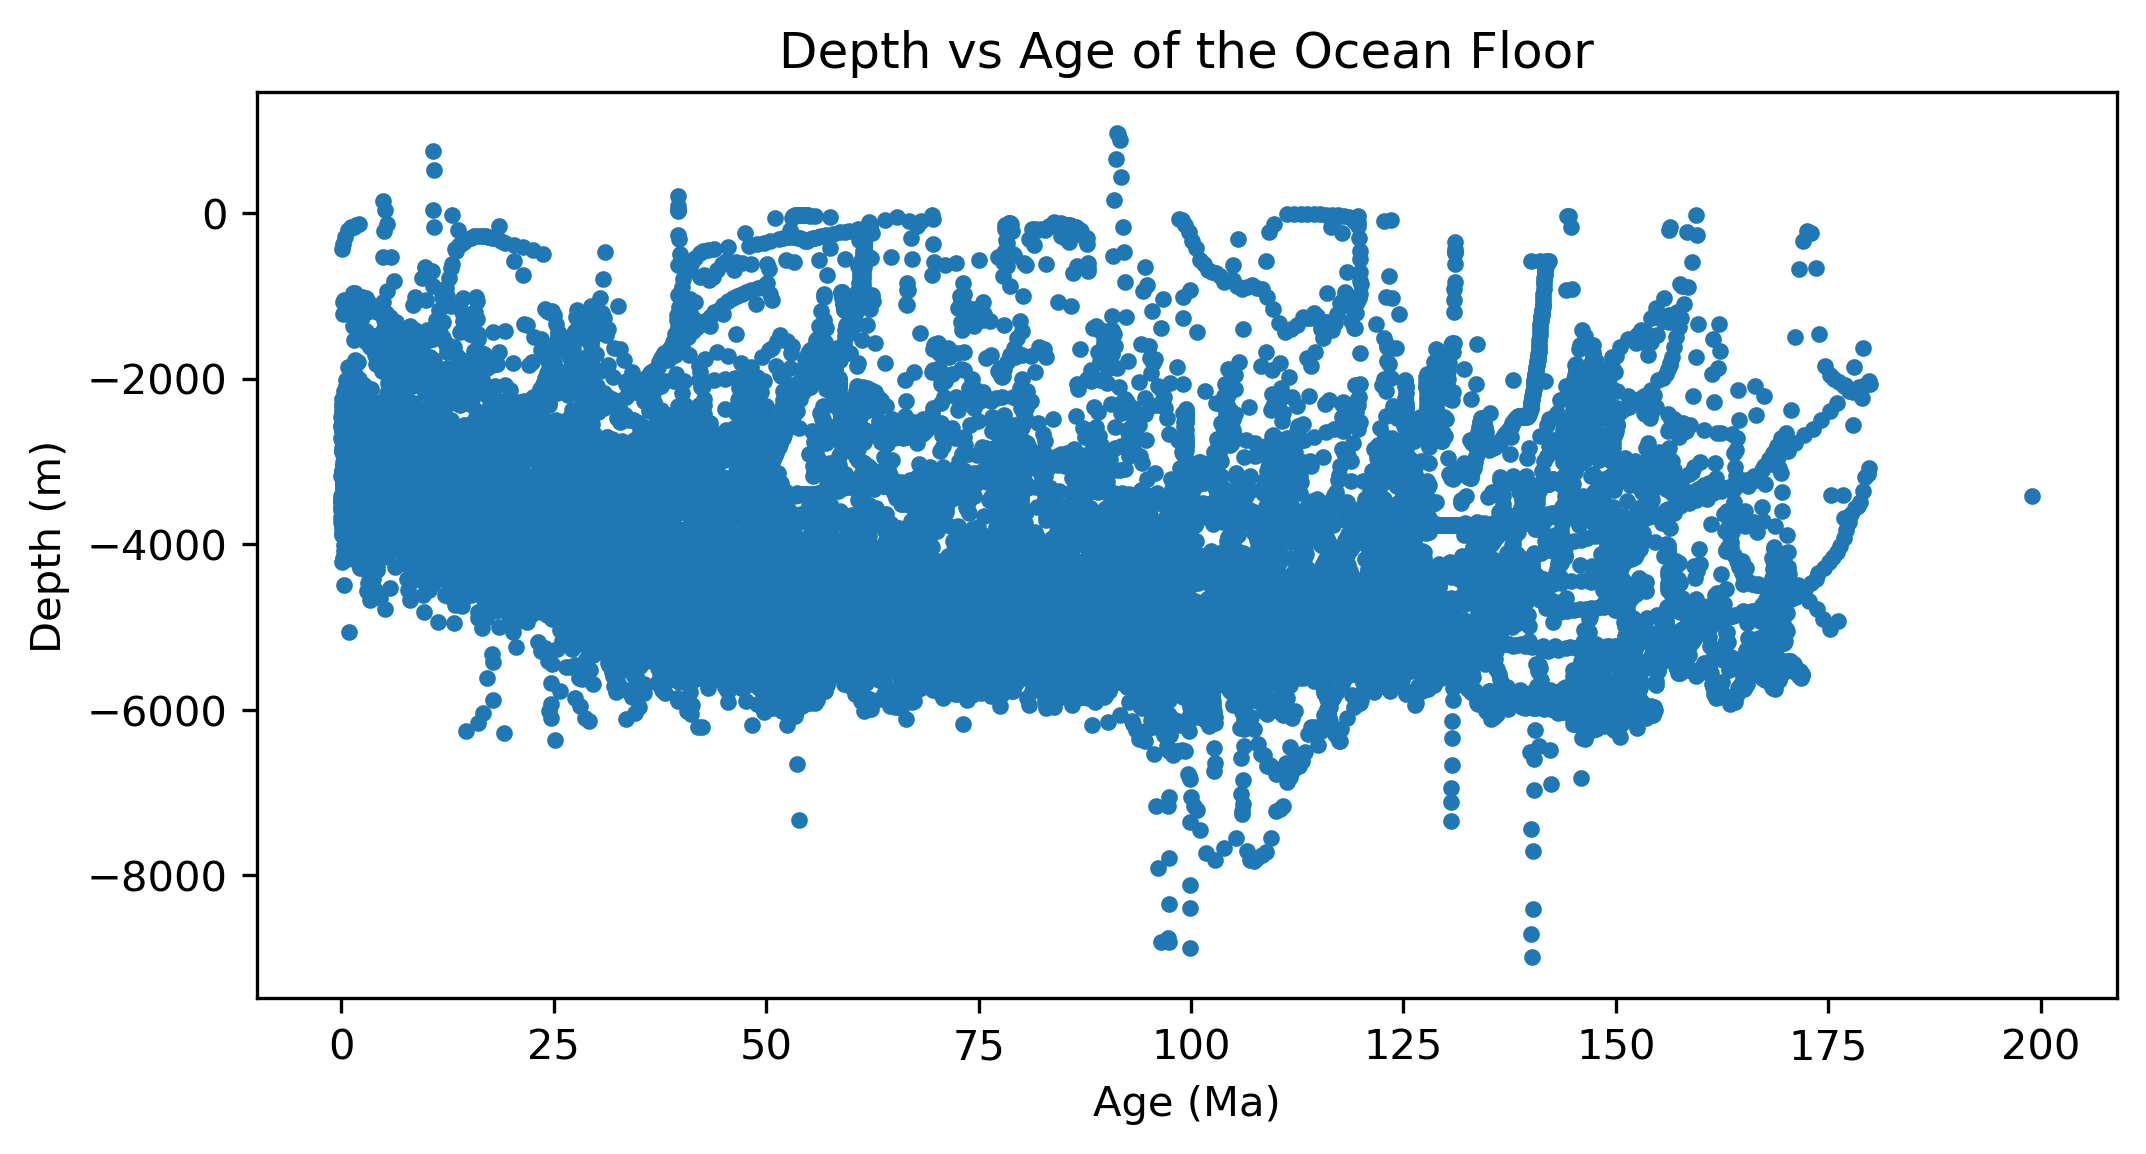

In [114]:
fig = plt.figure (figsize=(8,4), dpi = 300)
ax= plt.scatter(x,y, marker = '.')
ax = plt.ylabel('Depth (m)')
ax = plt.xlabel('Age (Ma)')
ax =plt.title('Depth vs Age of the Ocean Floor')

# This figure shows that there is no clear correlation between age and depth 

Smoothing

Now try interpolating the bathymetry to a smoothed / downsampled version of the ages.

```python
ages_reduced = ages[::8,::8] # This is arbitrary, you should try some different ones

# OR

ages_reduced2 = imresize(ages, (226,451), interp='bilinear', mode="F")

# OR

ages_reduced2 = imresize(ages, (226,451), interp='bicubic', mode="F")

# OR

ages_reduced2 = imresize(ages, (226,451), interp='lanczos', mode="F")
```

Comment on which of these is the more effective.


In [41]:
ages_reduced = ages[::8,::8]
ages_reduced2 = imresize(ages, (226,451), interp='bilinear', mode="F")
fig = plt.figure(figsize=(12, 6), facecolor="none")
ax = plt.axes(projection=base_projection)
ax.coastlines(resolution='50m', zorder=1)  
ax.imshow(ages, extent = extent, transform = ccrs.PlateCarree(), origin="upper", )
ages_reduced3 = imresize(ages, (226,451), interp='bicubic', mode="F")
ages_reduced4 = imresize(ages, (226,451), interp='lanczos', mode="F")
                        
topo_reduced = etopoH_1[::8,::8]
topo_reduced2 = imresize(etopoH_1, (226,451), interp='bilinear', mode="F")
topo_reduced3 = imresize(etopoH_1, (226,451), interp='bicubic', mode="F")
topo_reduced4 = imresize(etopoH_1, (226,451), interp='lanczos', mode="F")

C:\Users\court\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  
C:\Users\court\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\court\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  after removing the cwd from sys.path.
C:\Users\court\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0,

Text(0.5, 1.0, 'Lanczos Interpolation')

<Figure size 864x864 with 0 Axes>

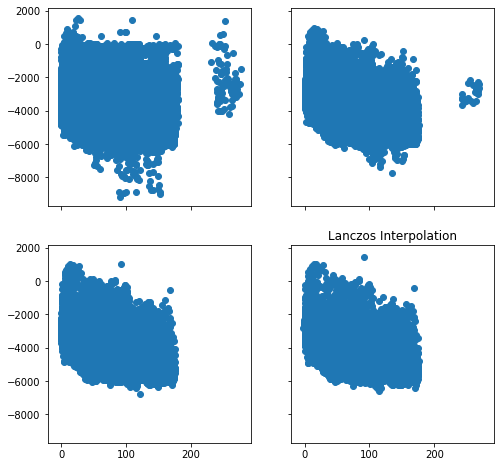

In [121]:
fig  = plt.figure(figsize=(12, 12), facecolor="none")
base_projection = ccrs.PlateCarree() 

fig, axes = plt.subplots(ncols=2, nrows=2, sharex='all', sharey='all')
ax1, ax2, ax3, ax4 = axes.ravel()
fig.set_size_inches((8,8))

ax1 = ax1.scatter(ages_reduced, topo_reduced)
plt.title("Downsampled Data")

ax2 = ax2.scatter(ages_reduced2, topo_reduced2)
plt.title("Bilinear Interpolation")

ax3 = ax3.scatter(ages_reduced3, topo_reduced3)
plt.title("Bicubic Interpolation")

ax4 = ax4.scatter(ages_reduced4, topo_reduced4)
plt.title("Lanczos Interpolation")



### Task

Plot the age/depth data and see if it looks smoother.

Make a scatterplot with this data too (note: you will have to downsample the bathymetry too)

Does smoothing help bring out a trend ?


In [52]:
x = ages_reduced4
y = topo_reduced4
x.shape, y.shape

((226, 451), (226, 451))

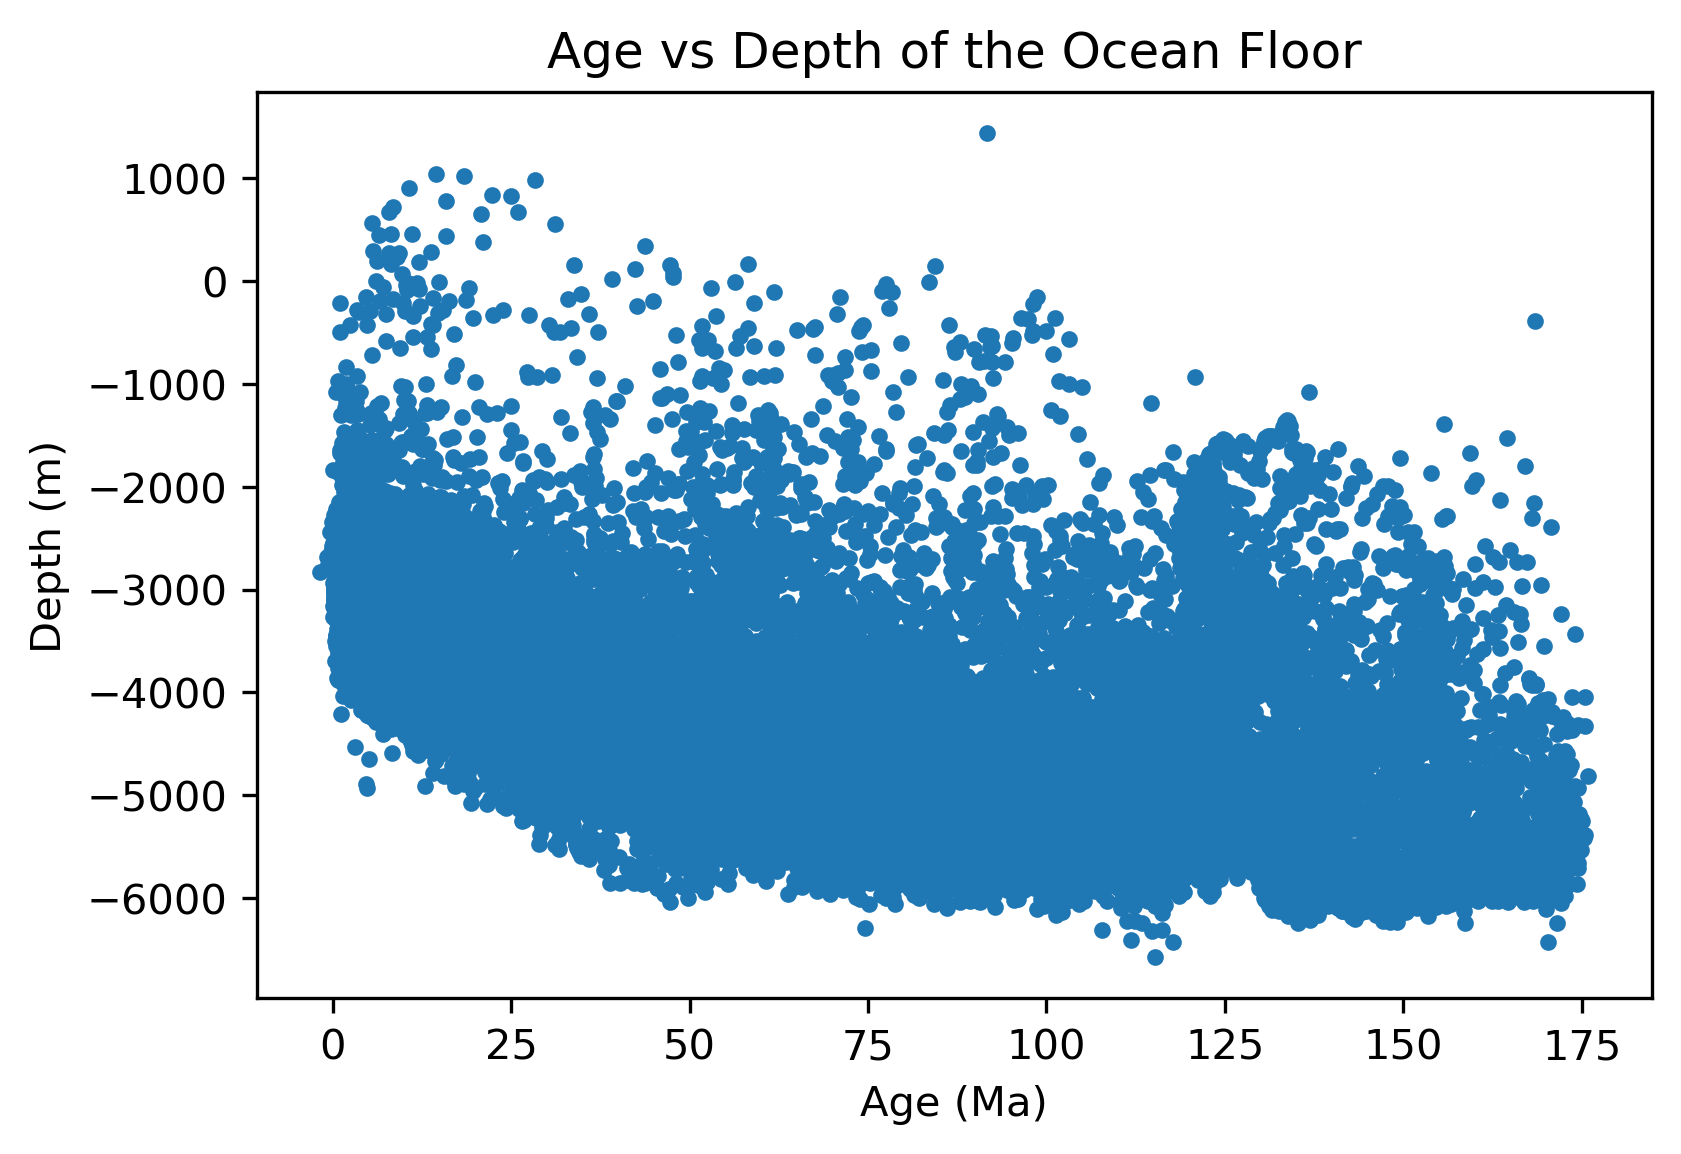

In [53]:
fig = plt.figure (figsize=(6,4), dpi = 300)
ax= plt.scatter(x,y, marker = '.')
ax = plt.ylabel('Depth (m)')
ax = plt.xlabel('Age (Ma)')
ax =plt.title('Age vs Depth of the Ocean Floor')

### Task

Fit $ \textrm{depth} = A + B\sqrt{\textrm{age}} $ to this data and create a plot

You should be able to use 

```python
from scipy.optimize import curve_fit
help(curve_fit)
```



In [62]:
maskage = ages_reduced4 > 0

ages_reduced5 = ages_reduced4[maskage]
topo_reduced5 = topo_reduced4[maskage]

len(topo_reduced5)

C:\Users\court\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


40410

In [69]:
len(ages_reduced5)

40410

In [81]:
np.isfinite(ages_reduced5).all()

True

In [142]:
from scipy.optimize import curve_fit
#help(curve_fit)

x=np.arange(0,200,10)

def function (x,A,B):
    return A + B*sqrt(x)

#func = curve_fit(function, ages_reduced5, topo_reduced5)
popt, pcov = curve_fit(function, ages_reduced5, topo_reduced5)
print ("function(x. a={}, b={})".format(popt[0],popt[1]))
#func


function(x. a=-3154.590459546993, b=-160.602033386395)


Therefore

A = -3154.59045955
B = -160.60203339

Text(0.5, 1.0, 'Age and Depth Line of Best Fit')

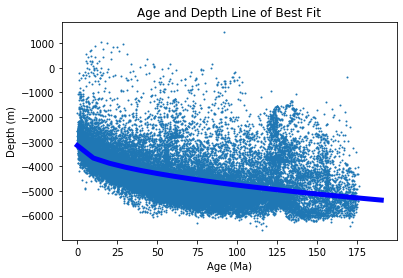

In [131]:
# plot curve of best fit. plot A and B, x data

plt.plot(x, function(x, -3154.59045955, -160.60203339), linewidth=5, color='blue')
plt.scatter(ages_reduced5, topo_reduced5, s=1)
plt.xlabel('Age (Ma)')
plt.ylabel('Depth (m)')
plt.title('Age and Depth Line of Best Fit')